In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv('C:/Users/Venati Himanth/OneDrive/Desktop/strive/python/ML/Images/Acea_Smart_Water_Analytics_ML/DATA/River_Arno.csv')

In [99]:
df

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [100]:
df.shape

(8217, 17)

In [101]:
features_nan=[features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,4),'%missing ')

Rainfall_Le_Croci 26.6642 %missing 
Rainfall_Cavallina 26.6642 %missing 
Rainfall_S_Agata 26.6642 %missing 
Rainfall_Mangona 26.6642 %missing 
Rainfall_S_Piero 26.6642 %missing 
Rainfall_Vernio 47.8764 %missing 
Rainfall_Stia 84.386 %missing 
Rainfall_Consuma 84.386 %missing 
Rainfall_Incisa 44.4079 %missing 
Rainfall_Montevarchi 79.9562 %missing 
Rainfall_S_Savino 84.386 %missing 
Rainfall_Laterina 84.386 %missing 
Rainfall_Bibbiena 71.06 %missing 
Rainfall_Camaldoli 84.386 %missing 
Temperature_Firenze 24.644 %missing 
Hydrometry_Nave_di_Rosano 0.5842 %missing 


# let's see the null values impact with the target variable

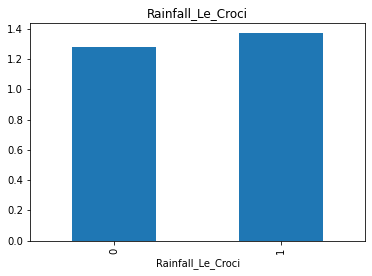

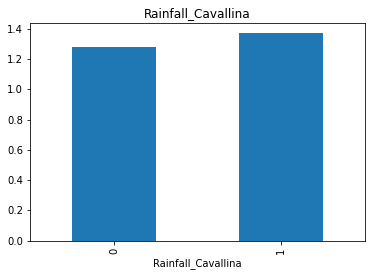

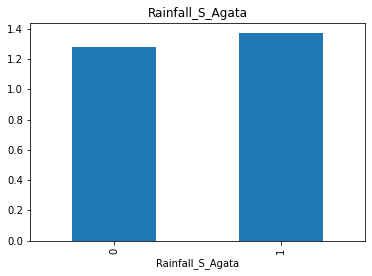

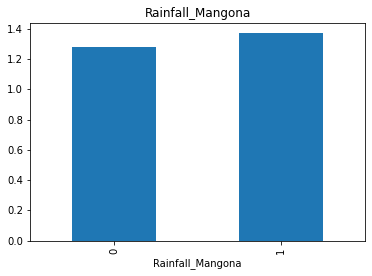

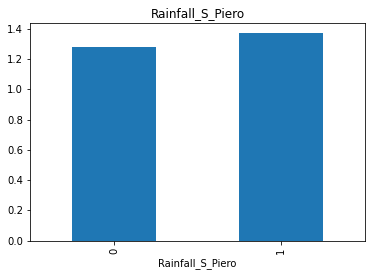

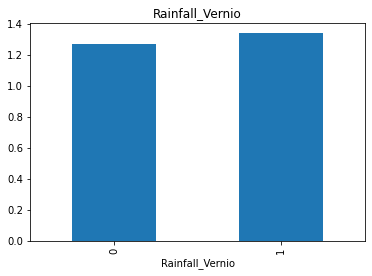

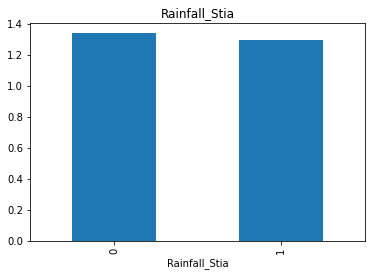

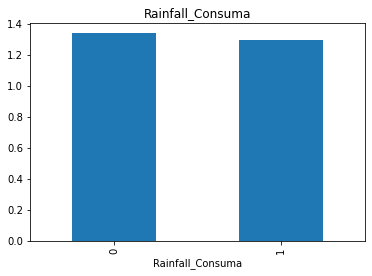

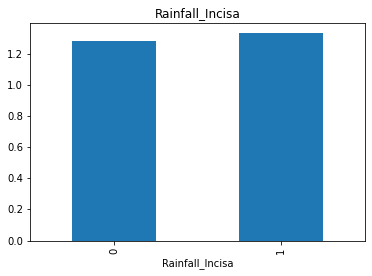

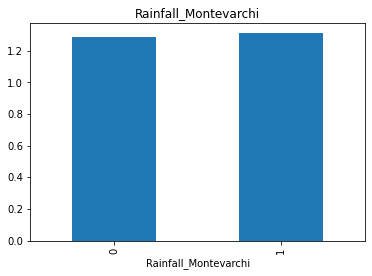

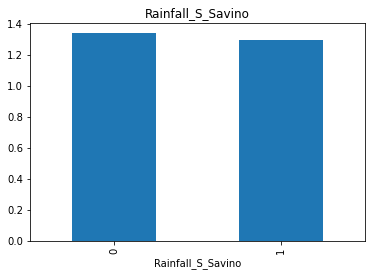

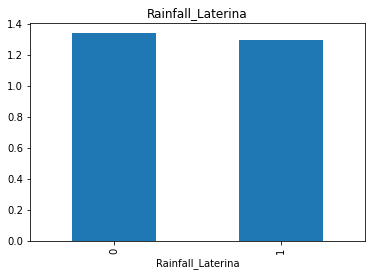

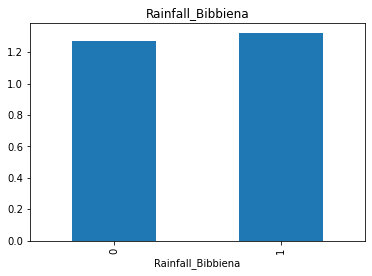

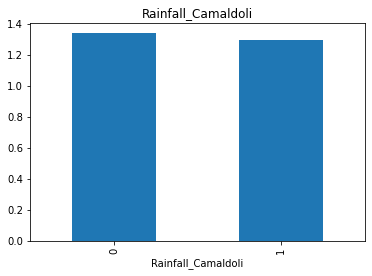

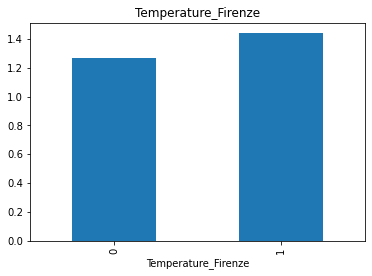

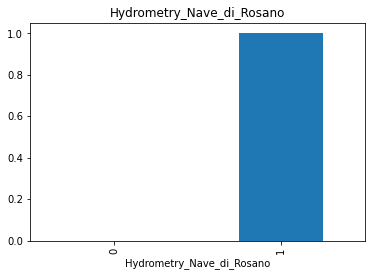

In [102]:
for feature in features_nan:
    data=df.copy()

    data[feature]=np.where(data[feature].isnull(),1,0)

    data.groupby(feature)['Hydrometry_Nave_di_Rosano'].median().plot.bar()
    plt.title(feature)
    plt.show()



In [103]:
for i in features_nan:
    df[i]=df[i].mean()

In [105]:
df.isnull().sum()

Date                         0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Rainfall_Stia                0
Rainfall_Consuma             0
Rainfall_Incisa              0
Rainfall_Montevarchi         0
Rainfall_S_Savino            0
Rainfall_Laterina            0
Rainfall_Bibbiena            0
Rainfall_Camaldoli           0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64

In [106]:
df.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03,8.217000e+03
mean,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00
std,3.690606e-13,2.100670e-13,2.327169e-13,2.957814e-13,9.148794e-14,2.571433e-13,1.247967e-13,2.589198e-13,6.572920e-14,2.957814e-13,1.363437e-13,1.012585e-13,1.998523e-14,7.079213e-13,1.847524e-12,1.732053e-13
min,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00
25%,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00
50%,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00
75%,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00
max,3.129871e+00,2.674743e+00,2.670063e+00,3.340657e+00,2.471225e+00,3.416437e+00,2.538893e+00,3.416680e+00,2.335026e+00,2.056709e+00,2.426500e+00,2.101949e+00,2.640959e+00,3.826968e+00,1.660539e+01,1.472407e+00


In [107]:
df.isnull().sum()

Date                         0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Rainfall_Stia                0
Rainfall_Consuma             0
Rainfall_Incisa              0
Rainfall_Montevarchi         0
Rainfall_S_Savino            0
Rainfall_Laterina            0
Rainfall_Bibbiena            0
Rainfall_Camaldoli           0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64

In [108]:
df['Rainfall_Cavallina'].value_counts().unique

<bound method Series.unique of 2.674743    8217
Name: Rainfall_Cavallina, dtype: int64>

In [109]:
df['Rainfall_Le_Croci']=df['Rainfall_Le_Croci'].mean()
df['Rainfall_Cavallina']=df['Rainfall_Le_Croci'].mean()

In [110]:
df['Rainfall_Cavallina'].isnull().sum()

0